#Blood Cell Classification Project

##Goal
To develop an automated system using Convolutional Neural Networks (CNNs) for classifying blood cell subtypes, enhancing diagnostic efficiency and accuracy in identifying blood-related diseases.




## 1. Project Setup
- **Install Required Libraries**


In [ ]:
# Import Required Libraries
# Basic libraries for data handling and visualization
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
import pickle
import re
# TensorFlow/Keras libraries for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# Scikit-learn libraries for preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

from tensorflow.keras.preprocessing.image import load_img, img_to_array

- **Project Directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dirctory= '/content/drive/MyDrive/Blood cells Project/JPEGImages'
label_directory= '/content/drive/MyDrive/Blood cells Project'
test_directory = '/content/drive/MyDrive/Blood cells Project/TEST'
trian_directory = '/content/drive/MyDrive/Blood cells Project/TRAIN'


## 2. Data loading

In [ ]:


def load_data(test_directory, target_size=(128, 128)): # for pretrained  target size 224x224
    images = []
    labels = []
    class_names = {}
    # Walk through the test directory
    for i, (root, dirs, files) in enumerate(os.walk(test_directory)): # Changed test_dir to test_directory
        print(f"Processing class {i}: {root} {dirs} {len(files)}")
        if len(files) > 0:  # Ensure it's a folder with images
            class_name = os.path.basename(root)
            class_names[i] = class_name  # Map index to class name
            for file in files:
                file_path = os.path.join(root, file)
                # Load and preprocess the image
                img = load_img(file_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(i)  # Use the class index as the label
        print(f"Processed class {i}: {root} {len(images)}")
    # Convert to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_names

In [ ]:
new_images, new_labels, new_names = load_data(trian_directory, target_size=(128, 128))

Processing class 0: /content/drive/MyDrive/Blood cells Project/TRAIN ['NEUTROPHIL', 'EOSINOPHIL', 'MONOCYTE', 'LYMPHOCYTE'] 0
Processed class 0: /content/drive/MyDrive/Blood cells Project/TRAIN 0
Processing class 1: /content/drive/MyDrive/Blood cells Project/TRAIN/NEUTROPHIL [] 2509
Processed class 1: /content/drive/MyDrive/Blood cells Project/TRAIN/NEUTROPHIL 2509
Processing class 2: /content/drive/MyDrive/Blood cells Project/TRAIN/EOSINOPHIL [] 2497
Processed class 2: /content/drive/MyDrive/Blood cells Project/TRAIN/EOSINOPHIL 5006
Processing class 3: /content/drive/MyDrive/Blood cells Project/TRAIN/MONOCYTE [] 97
Processed class 3: /content/drive/MyDrive/Blood cells Project/TRAIN/MONOCYTE 5103
Processing class 4: /content/drive/MyDrive/Blood cells Project/TRAIN/LYMPHOCYTE [] 2483
Processed class 4: /content/drive/MyDrive/Blood cells Project/TRAIN/LYMPHOCYTE 7586


In [ ]:
test_images, test_labels, test_names = load_data(test_directory, target_size=(128, 128))

Processing class 0: /content/drive/MyDrive/Blood cells Project/TEST ['MONOCYTE', 'NEUTROPHIL', 'LYMPHOCYTE', 'EOSINOPHIL'] 0
Processed class 0: /content/drive/MyDrive/Blood cells Project/TEST 0
Processing class 1: /content/drive/MyDrive/Blood cells Project/TEST/MONOCYTE [] 620
Processed class 1: /content/drive/MyDrive/Blood cells Project/TEST/MONOCYTE 620
Processing class 2: /content/drive/MyDrive/Blood cells Project/TEST/NEUTROPHIL [] 624
Processed class 2: /content/drive/MyDrive/Blood cells Project/TEST/NEUTROPHIL 1244
Processing class 3: /content/drive/MyDrive/Blood cells Project/TEST/LYMPHOCYTE [] 620
Processed class 3: /content/drive/MyDrive/Blood cells Project/TEST/LYMPHOCYTE 1864
Processing class 4: /content/drive/MyDrive/Blood cells Project/TEST/EOSINOPHIL [] 623
Processed class 4: /content/drive/MyDrive/Blood cells Project/TEST/EOSINOPHIL 2487


In [ ]:
new_images.shape

(7586, 128, 128, 3)

In [ ]:
import pandas as pd

# Convert the NumPy array to a Pandas Series
new_labels_series = pd.Series(new_labels)

# Now you can use value_counts()
new_labels_series.value_counts()

,count
1,2509
2,2497
4,2483
3,97


In [ ]:
y_categorical = to_categorical(new_labels)

In [ ]:

y_categorical

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

## 3.Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_images, y_categorical, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(6068, 128, 128, 3)

## 3. Model Building

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(128, 128, 3)), # Changed input shape to (128, 128, 3)
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax') # Change the output layer to have 5 neurons
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 41, 41, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 41, 41, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 41, 41, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 13, 13, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 6, 6, 512)           │           2,0

 Total params: 11,418,245 (43.56 MB)

 Trainable params: 11,411,845 (43.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

## 4. Model Training


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitor the validation loss
    patience=5,               # Stop training after 5 epochs of no improvement
    restore_best_weights=True # Restore model weights from the best epoch
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Monitor the validation loss
    factor=0.5,               # Reduce learning rate by half
    patience=3,               # Wait for 3 epochs of no improvement before reducing
    min_lr=1e-6,              # Minimum learning rate
    verbose=1                 # Print messages when learning rate is reduced
)
# Fit the model with callbacks

# Fit the model with callbacks
history = model.fit(
    x_train, y_train,
    epochs=50,                 # Set a high number of epochs; EarlyStopping will stop it earlier
    batch_size=32,             # Adjust batch size based on your dataset and memory
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]) # Add callbacks

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 47s 177ms/step - accuracy: 0.3408 - loss: 1.8052 - val_accuracy: 0.3478 - val_loss: 1.3907 - learning_rate: 0.0010
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 50s 70ms/step - accuracy: 0.4253 - loss: 1.3302 - val_accuracy: 0.3867 - val_loss: 1.3485 - learning_rate: 0.0010
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.4457 - loss: 1.2210 - val_accuracy: 0.4868 - val_loss: 1.0701 - learning_rate: 0.0010
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.5012 - loss: 1.0946 - val_accuracy: 0.3524 - val_loss: 1.3542 - learning_rate: 0.0010
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.5399 - loss: 0.9656 - val_accuracy: 0.4315 - val_loss: 1.3441 - learning_rate: 0.0010
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5906 - loss: 0.8892
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
190/190 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.5906 - lo

In [ ]:
model.save("Blood Cell.h5")

## 5. Prediction

In [ ]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Initialize the ImageDataGenerator with preprocessing function
image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

# Function to create a DataFrame from a directory
def create_dataframe(directory):
    filepaths = []
    labels = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                filepaths.append(os.path.join(class_path, filename))
                labels.append(class_name)
    return pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Create the training data generator
train_df = create_dataframe(trian_directory)
train = image_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepaths",
    y_col="labels",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=8,
    shuffle=False
)

# Create the testing data generator
test_df = create_dataframe(test_directory)  # Create DataFrame for test data
test = image_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepaths",
    y_col="labels",
    target_size=(128, 128),
    color_mode='rgb',
    class_mode="categorical",
    batch_size=8,
    shuffle=False
)

Found 7586 validated image filenames belonging to 4 classes.
Found 2487 validated image filenames belonging to 4 classes.


In [ ]:
prediction = model.predict(test_images)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step


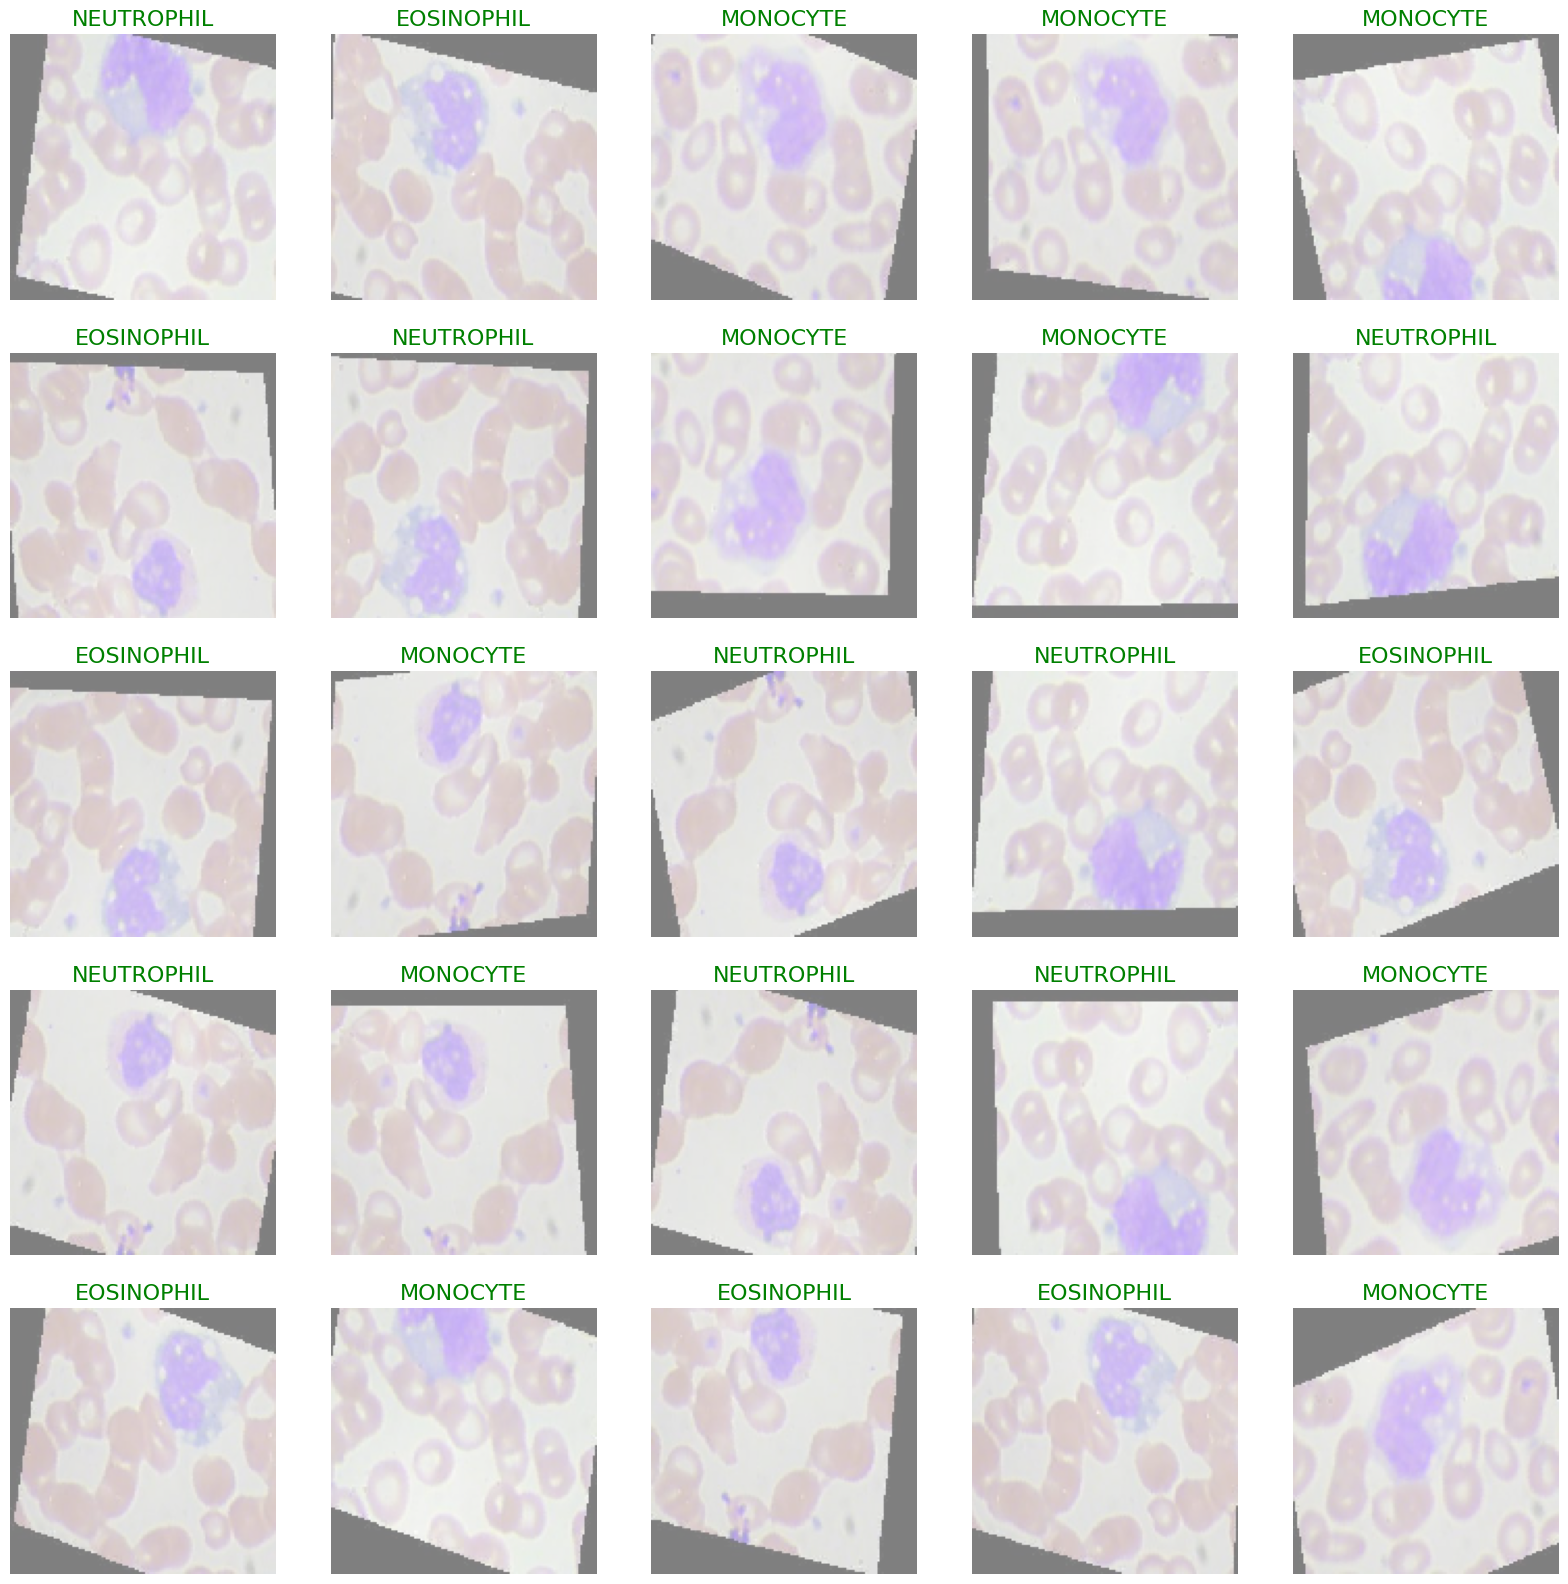

In [ ]:
def show_predictions(images, predictions, class_names):
    plt.figure(figsize=(20, 20))
    num_images = min(len(images), 25)  # Show up to 25 images
    # Convert predictions to numpy array
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2  # Scale images if necessary
        plt.imshow(image)

        predicted_index = np.argmax(predictions [i])  # Get the index of the predicted class using numpy array
        predicted_class = class_names[predicted_index]  # Get the class name
        plt.title(predicted_class, color="green", fontsize=16)
        plt.axis('off')

    plt.show()

# Display the predictions
show_predictions(test_images, prediction, test_names) #Pass 'prediction' instead of 'predictions'

## 6. Model Evaluation

In [ ]:
# ... (your previous code) ...
import numpy as np

# Get the class with the highest probability
predicted_labels = np.argmax(prediction, axis=1)

# Evaluate using the test images and their corresponding labels
# Assuming 'test_images' and 'test_labels' are your test data and labels
# Note: 'test_labels' should be one-hot encoded for categorical cross-entropy loss
test_loss, test_accuracy = model.evaluate(test_images, to_categorical(test_labels), verbose=1)
print(f"\nTest Loss: {test_loss}, Test Accuracy: {test_accuracy}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3370 - loss: 1.5197

Test Loss: 1.897241234779358, Test Accuracy: 0.28065943717956543


In [ ]:
# Print the shape of the first batch from the generator
for batch_x, batch_y in test:
    print("Batch Input Shape:", batch_x.shape)
    print("Batch Labels Shape:", batch_y.shape)
    break  # Stop after the first batch

Batch Input Shape: (8, 128, 128, 3)
Batch Labels Shape: (8, 4)


In [ ]:
# Collect images from the generator
test_images_from_gen = []
test_labels_from_gen = []
for batch_x, batch_y in test:
    test_images_from_gen.extend(batch_x)  # Add images to list
    test_labels_from_gen.extend(batch_y)  # Add labels to list

# Convert to NumPy arrays outside the loop
test_images_from_gen = np.array(test_images_from_gen)
test_labels_from_gen = np.array(test_labels_from_gen)

# Check for empty dimensions and reshape if necessary
if 0 in test_images_from_gen.shape or 0 in test_labels_from_gen.shape:
    # Reshape to remove empty dimensions (adjust indices as needed)
    test_images_from_gen = test_images_from_gen.reshape(-1, 128, 128, 3)
    test_labels_from_gen = test_labels_from_gen.reshape(-1, 4) # Assuming you have 4 classes

# Now evaluate the model with the collected and reshaped data:
model.evaluate(test_images_from_gen, test_labels_from_gen, verbose=1)

In [ ]:
model.evaluate(test, verbose=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Instead of 'test_images.labels', use 'test_labels' which contains your ground truth
y_test = test_labels

# Convert predictions to class labels
predicted_labels = np.argmax(prediction, axis=1) # Get the class with the highest probability

# Now use predicted_labels in classification_report
print(classification_report(y_test, predicted_labels))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, predicted_labels)*100))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np  # Import numpy

class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

# Convert predictions to class labels before calculating the confusion matrix
predicted_labels = np.argmax(prediction, axis=1)

cm = confusion_matrix(y_test, predicted_labels) # Use predicted_labels instead of prediction

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

In [ ]:
#Evaluate the model with the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {test_loss}, Test Accuracy: {test_accuracy}")



In [ ]:
# evaluate_model_metrics(model, test_images, test_labels, class_names)

# we should consider using class weight but comment now

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight

# # Extract class labels from y_train
# y_train_labels = np.argmax(y_train, axis=1)

# # Calculate class weights
# class_weights = compute_class_weight(
#     class_weight='balanced',  # To address class imbalance
#     classes=np.unique(y_train_labels),  # y_train_labels should be your training labels
#     y=y_train_labels
# )

# # Convert to a dictionary
# class_weights_dict = dict(enumerate(class_weights))

# # Pass to the model's fit method
# simple_model = create_simple_model(x_train)
# history = simple_model.fit(
#     x_train,
#     y_train,
#     epochs=10,
#     batch_size=32,
#     validation_data=(x_test, y_test),
#     class_weight=class_weights_dict
# )

In [ ]:
import pickle
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Define the path to save the model on your Drive
model_save_path = '/content/drive/MyDrive/model_agu_calss_wieght.pkl'

# Save the model
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
#history = model.fit(x_train, y_train, epochs=12, validation_data=(x_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(x_trian, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# accuracy = model.evaluate(train_generator, val_generator, verbose=0)
# print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
### after model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Assuming 'images' and 'labels_ordered' are defined
# Reshape if necessary (for grayscale)
if new_images.ndim == 3:
    images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2], 1)

# Apply data augmentation to the images
augmented_images = data_augmentation(new_images)

# Now you can use 'augmented_images' and 'labels_ordered' for training